In [1]:
from cvxopt.solvers import qp
from cvxopt.base import matrix

In [2]:
import numpy,pylab,random,math

In [14]:
def linear_kernel(x,y):
    return sum(p*q for p,q in zip(x,y))+1    

In [90]:
def indicator(x,y): # x, y are coordinates of new data points
    sum=0
    for p in data_update:
        sum+=linear_kernel((x,y),p[:2])*p[2]*p[3]
        
    return sum

# generating testing data

In [67]:
classA = [(random.gauss (-3,1),random.gauss(2.5,1),1.0) for i in range(5)]+[(random.gauss (3,1),random.gauss(2.5,1),1.0) for i in range(5)]

In [68]:
classB = [(random.gauss (0,0.5),random.gauss(-0.5,0.5),-1.0) for i in range(10)] 

In [69]:
data = classA + classB
random.shuffle(data)

In [11]:
%matplotlib inline

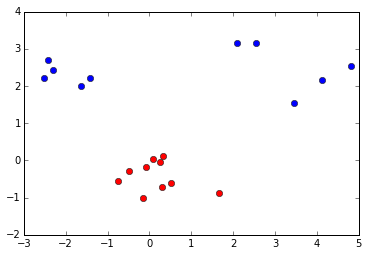

In [70]:
pylab.plot([p[0] for p in classA],[p[1] for p in classA],"bo")
pylab.plot([p[0] for p in classB],[p[1] for p in classB],"ro")

# build the P matrix from a given dataset

In [71]:
P=[]
for p in data:
    l=[]
    for q in data:
        l.append(linear_kernel(p[:2],q[:2])*p[2]*q[2])
    P.append(l)

# build the vector q, G, h

In [72]:
q=matrix([-1]*20,(20,1),"d") # q,h,G must be double type matrix
h=matrix([0]*20,(20,1),"d")
G=-1*numpy.eye(20,dtype=float)

In [73]:
print linear_kernel(data[0][:2],data[0][:2])

12.278446734


In [74]:
print matrix(P)

[ 1.23e+01 -9.19e-01  8.35e-01  1.54e+00 -1.71e+00  1.22e+01 -3.87e-01 ... ]
[-9.19e-01  1.01e+00  9.38e-01 -1.35e+00  9.16e-01 -9.46e-01  1.03e+00 ... ]
[ 8.35e-01  9.38e-01  2.04e+00  2.59e+00  1.66e+00  1.09e+00  8.41e-01 ... ]
[ 1.54e+00 -1.35e+00  2.59e+00  1.75e+01  2.63e+00  2.78e+00 -2.18e+00 ... ]
[-1.71e+00  9.16e-01  1.66e+00  2.63e+00  1.86e+00 -1.43e+00  6.90e-01 ... ]
[ 1.22e+01 -9.46e-01  1.09e+00  2.78e+00 -1.43e+00  1.22e+01 -4.82e-01 ... ]
[-3.87e-01  1.03e+00  8.41e-01 -2.18e+00  6.90e-01 -4.82e-01  1.12e+00 ... ]
[ 2.66e+00 -1.31e+00  2.50e+00  1.63e+01  2.28e+00  3.80e+00 -2.03e+00 ... ]
[ 9.50e+00 -1.00e+00  1.02e+00  4.38e+00 -8.73e-01  9.67e+00 -7.58e-01 ... ]
[ 9.53e+00 -9.77e-01  7.63e-01  3.17e+00 -1.15e+00  9.62e+00 -6.67e-01 ... ]
[-8.29e-01  9.85e-01  1.19e+00 -2.26e-01  1.16e+00 -7.72e-01  9.53e-01 ... ]
[-5.56e+00 -1.49e+00  2.31e+00  2.13e+01  4.00e+00 -3.97e+00 -2.88e+00 ... ]
[ 5.14e+00  1.08e+00  1.61e+00 -2.52e+00  2.07e-01  4.97e+00  1.47e+00 ... ]

# call the function qp to solve our quadratic optimization problem

In [75]:
r=qp(matrix(P),q,matrix(G),h)

     pcost       dcost       gap    pres   dres
 0: -2.1135e+00 -4.3993e+00  4e+01  6e+00  2e+00
 1: -1.1326e+00 -3.1255e+00  9e+00  1e+00  3e-01
 2: -7.8509e-01 -1.7544e+00  1e+00  2e-16  9e-16
 3: -1.1822e+00 -1.3822e+00  2e-01  2e-16  4e-16
 4: -1.3337e+00 -1.3646e+00  3e-02  1e-16  8e-16
 5: -1.3545e+00 -1.3549e+00  3e-04  2e-16  9e-16
 6: -1.3548e+00 -1.3548e+00  3e-06  5e-16  7e-16
 7: -1.3548e+00 -1.3548e+00  3e-08  5e-16  8e-16
Optimal solution found.


In [76]:
alpha=list(r["x"])

In [77]:
alpha

[1.2342235764378279e-09,
 1.4226966032330819e-08,
 1.1307609951712292e-09,
 8.270062512138984e-10,
 1.744069942617708e-09,
 2.553623595446579e-09,
 1.933783072124257,
 8.510293908384701e-10,
 3.4774813950296403e-09,
 0.3803205354487958,
 3.955780947297807e-09,
 1.1216301832537215e-09,
 1.4894138714314768e-09,
 2.7555049973501693e-09,
 1.8291290207842835e-09,
 1.6821016761647203e-09,
 1.5483880110894212e-09,
 0.395411606870636,
 1.8413699898097852e-09,
 7.591966671459444e-09]

# save non-zero alpha values and corresponding data points

In [79]:
data_update=[]
for i in range(len(alpha)):
    if alpha[i]>10e-05:
        p=data[i]
        data_update.append(p+(alpha[i],))

print data_update    

[(0.33439914135421495, 0.10583928754139804, -1.0, 1.933783072124257), (-1.6291502800722057, 1.9973254268377232, 1.0, 0.3803205354487958), (3.4650212538028846, 1.5432718447228706, 1.0, 0.395411606870636)]


# plotting the decision boundary

In [87]:
xrange = numpy.arange(-4,4,0.05)
yrange = numpy.arange(-4,4,0.05)

In [91]:
grid = matrix([[indicator(x,y) for y in yrange] for x in xrange])

<matplotlib.contour.QuadContourSet instance at 0x1125667e8>

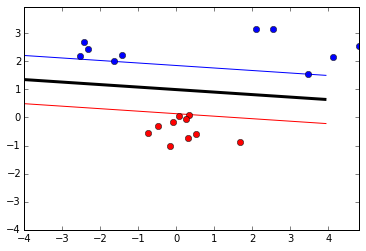

In [93]:
pylab.plot([p[0] for p in classA],[p[1] for p in classA],"bo")
pylab.plot([p[0] for p in classB],[p[1] for p in classB],"ro")
pylab.contour(xrange,yrange,grid,(-1.0,0.0,1.0),colors=("red","black","blue"),linewidths=(1,3,1))

# define a non-linear kernel to classify a very hard dataset

In [94]:
def polynomial_kernel(x,y,p): # the exponent p controls the degree of polymonials
    return math.pow(linear_kernel(x,y),p)

# generate a hard testing dataset

In [100]:
class1 = [(random.gauss (-3,1),random.gauss(2.5,1),1.0) for i in range(5)]+[(random.gauss (0,1),random.gauss(1,1),1.0) for i in range(5)]+[(random.gauss (3,1),random.gauss(2.5,1),1.0) for i in range(5)]

In [101]:
class2 = [(random.gauss (-3.5,1),random.gauss(0.5,1),-1.0) for i in range(5)]+[(random.gauss (-0.5,1),random.gauss(-1,1),-1.0) for i in range(5)]+[(random.gauss (3,1),random.gauss(0.5,1),-1.0) for i in range(5)]

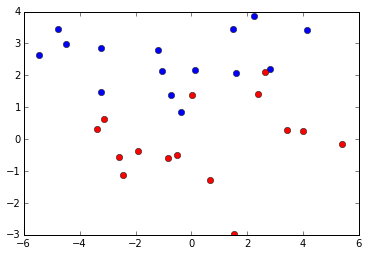

In [98]:
pylab.plot([p[0] for p in class1],[p[1] for p in class1],"bo")
pylab.plot([p[0] for p in class2],[p[1] for p in class2],"ro")

In [102]:
data2=class1+class2
random.shuffle(data2)

In [105]:
P2=[]
for p in data2:
    l=[]
    for q in data2:
        l.append(polynomial_kernel(p[:2],q[:2],2)*p[2]*q[2]) # exponent p = 2
    P2.append(l)

q=matrix([-1]*30,(30,1),"d") # q,h,G must be double type matrix
h=matrix([0]*30,(30,1),"d")
G=-1*numpy.eye(30,dtype=float)

In [106]:
r2=qp(matrix(P2),q,matrix(G),h)

     pcost       dcost       gap    pres   dres
 0: -1.2909e+01 -3.4500e+01  1e+02  8e+00  3e+00
 1: -5.4785e+01 -9.3845e+01  8e+01  5e+00  2e+00
 2: -2.2217e+02 -2.8163e+02  6e+01  4e+00  1e+00
 3: -7.5044e+02 -8.5270e+02  1e+02  3e+00  1e+00
 4: -2.9235e+03 -3.1836e+03  3e+02  3e+00  1e+00
 5: -1.3494e+04 -1.4339e+04  8e+02  3e+00  1e+00
 6: -1.1130e+05 -1.1529e+05  4e+03  3e+00  1e+00
 7: -2.5296e+06 -2.5521e+06  2e+04  3e+00  1e+00
 8: -2.6623e+08 -2.6642e+08  2e+05  3e+00  1e+00
 9: -8.1482e+09 -8.1541e+09  6e+06  3e+00  1e+00
10: -6.7644e+10 -6.7690e+10  5e+07  3e+00  1e+00
Terminated (singular KKT matrix).


# p = 2 can't find optimal solution, try p = 5

In [109]:
P2=[]
for p in data2:
    l=[]
    for q in data2:
        l.append(polynomial_kernel(p[:2],q[:2],5)*p[2]*q[2]) # exponent p = 5
    P2.append(l)

q=matrix([-1]*30,(30,1),"d") # q,h,G must be double type matrix
h=matrix([0]*30,(30,1),"d")
G=-1*numpy.eye(30,dtype=float)    
r2=qp(matrix(P2),q,matrix(G),h)

     pcost       dcost       gap    pres   dres
 0: -7.5458e+00 -2.2320e+01  1e+02  9e+00  3e+00
 1: -2.3049e+01 -4.6603e+01  1e+02  6e+00  2e+00
 2: -8.3323e+01 -1.0500e+02  7e+01  4e+00  1e+00
 3: -1.8322e+02 -2.0801e+02  8e+01  4e+00  1e+00
 4: -3.5795e+02 -3.8118e+02  1e+02  3e+00  1e+00
 5: -2.5099e+02 -2.3977e+02  2e+02  2e+00  7e-01
 6: -9.9346e+01 -5.7492e+01  2e+02  1e+00  4e-01
 7: -4.2066e+01 -1.5938e+01  6e+01  4e-01  1e-01
 8: -2.8429e+00 -4.3260e+00  3e+01  8e-02  3e-02
 9: -1.1690e+00 -2.8123e+00  7e+00  2e-02  6e-03
10: -1.4785e+00 -2.2824e+00  2e+00  6e-03  2e-03
11: -1.3662e+00 -2.0232e+00  2e+00  3e-03  9e-04
12: -1.3838e+00 -1.7872e+00  1e+00  1e-03  4e-04
13: -1.4326e+00 -1.4856e+00  1e-01  1e-04  4e-05
14: -1.4402e+00 -1.4430e+00  5e-03  4e-06  1e-06
15: -1.4415e+00 -1.4415e+00  5e-05  4e-08  1e-08
16: -1.4415e+00 -1.4415e+00  5e-07  4e-10  1e-10
Optimal solution found.


In [113]:
alpha=list(r2["x"])
data2_update=[]
for i in range(len(alpha)):
    if alpha[i]>10e-05:
        p=data2[i]
        data2_update.append(p+(alpha[i],))  

# plotting decision boundary, a polynomial hyperplane

In [114]:
def indicator(x,y): # x, y are coordinates of new data points
    sum=0
    for p in data2_update:
        sum+=polynomial_kernel((x,y),p[:2],5)*p[2]*p[3]
        
    return sum

In [117]:
xrange = numpy.arange(-6,6,0.05)
yrange = numpy.arange(-6,6,0.05)
grid = matrix([[indicator(x,y) for y in yrange] for x in xrange])

<matplotlib.contour.QuadContourSet instance at 0x112a231b8>

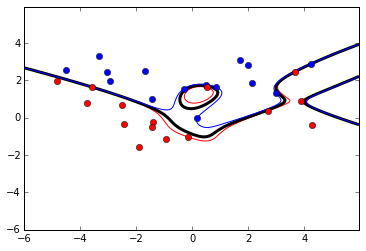

In [118]:
pylab.plot([p[0] for p in class1],[p[1] for p in class1],"bo")
pylab.plot([p[0] for p in class2],[p[1] for p in class2],"ro")
pylab.contour(xrange,yrange,grid,(-1.0,0.0,1.0),colors=("red","black","blue"),linewidths=(1,3,1))

In [ ]:
# allow slack variables
C=3
